<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pourquoi-l'apprentissage-automatique-?" data-toc-modified-id="Pourquoi-l'apprentissage-automatique-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pourquoi l'apprentissage automatique ?</a></span></li><li><span><a href="#Qu'est-ce-que-l'apprentissage-automatique-?" data-toc-modified-id="Qu'est-ce-que-l'apprentissage-automatique-?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Qu'est-ce que l'apprentissage automatique ?</a></span></li><li><span><a href="#Types-d'apprentissage-automatique" data-toc-modified-id="Types-d'apprentissage-automatique-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Types d'apprentissage automatique</a></span></li><li><span><a href="#Apprentissage-=-Représentation-+-évaluation-+-optimisation" data-toc-modified-id="Apprentissage-=-Représentation-+-évaluation-+-optimisation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Apprentissage = Représentation + évaluation + optimisation</a></span></li><li><span><a href="#Surapprentissage-(overfitting)-et-sous-apprentissage(underfitting)" data-toc-modified-id="Surapprentissage-(overfitting)-et-sous-apprentissage(underfitting)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Surapprentissage (overfitting) et sous-apprentissage(underfitting)</a></span></li><li><span><a href="#De-meilleures-représentations-des-données,-de-meilleurs-modèles" data-toc-modified-id="De-meilleures-représentations-des-données,-de-meilleurs-modèles-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>De meilleures représentations des données, de meilleurs modèles</a></span></li><li><span><a href="#&quot;Un-plus-grand-nombre-de-données-peut-battre-un-algorithme-plus-intelligent&quot;" data-toc-modified-id="&quot;Un-plus-grand-nombre-de-données-peut-battre-un-algorithme-plus-intelligent&quot;-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>"Un plus grand nombre de données peut battre un algorithme plus intelligent"</a></span></li><li><span><a href="#Construire-des-systèmes-d'apprentissage-automatique" data-toc-modified-id="Construire-des-systèmes-d'apprentissage-automatique-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Construire des systèmes d'apprentissage automatique</a></span></li><li><span><a href="#Résumé" data-toc-modified-id="Résumé-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Résumé</a></span></li></ul></div>

<img src="https://cdn-images-1.medium.com/max/800/1*HNjcfB3lccaqB95fSWXJpQ.png" alt="image" width="100%">

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Installation automatique lors de l'exécution sur Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/master'):
    !git clone -q https://github.com/ML-course/master.git /content/master
    !pip --quiet install -r /content/master/requirements_colab.txt
    %cd master/notebooks

# Importations et paramètres globaux
%matplotlib inline
from preamble import *
interactive = True # Définir à True pour les tracés interactifs
if interactive:
    fig_scale = 1.5
else: # Pour l'affichage
    fig_scale = 0.3
    plt.rcParams.update(print_config)
    

## Pourquoi l'apprentissage automatique ?
- Moteurs de recherche (par exemple Google)
- Systèmes de recommandation (par exemple Netflix)
- Traduction automatique (par exemple, Google Translate, DeepL)
- Compréhension de la parole (p. ex. Siri, Alexa)
- Jeux (p. ex. AlphaGo)
- Voitures autopilotées
- Médecine personnalisée
- Progrès dans toutes les sciences : Génétique, astronomie, chimie, neurologie, physique,...


## Qu'est-ce que l'apprentissage automatique ?
- Apprendre à effectuer une tâche, sur la base de l'expérience (exemples) $X$, en minimisant l'erreur $\mathcal{E}$.
    - Par exemple, reconnaître une personne sur une image de la manière la plus précise possible.
- Souvent, nous voulons apprendre une fonction (modèle) $f$ avec certains paramètres de modèle $\theta$ qui produit la bonne sortie $y$

$$f_{\theta}(X) = y$$
$$\underset{\theta}{\operatorname{argmin}} \mathcal{E}(f_{\theta}(X))$$

- Fait généralement partie d'un système _beaucoup_ plus large qui fournit les données $X$ sous la bonne forme
    - Les données doivent être collectées, **nettoyées**, normalisées, vérifiées pour la présence de biais de données,...

### Biais inductif

- Dans la pratique, nous devons intégrer des hypothèses dans le modèle : _biais inductif_ $b$
    - À quoi doit ressembler le modèle ?
        - Imiter le cerveau humain : Réseaux neuronaux
        - Combinaison logique d'entrées : Arbres de décision, modèles linéaires
        - Se souvenir d'exemples similaires : Voisins les plus proches, SVM
        - Distribution de probabilités : Modèles bayésiens
    - Paramètres définis par l'utilisateur (hyperparamètres)
        - Par exemple, la profondeur de l'arbre, l'architecture du réseau
    - Affirmations sur la distribution des données, par exemple $X \sim N(\mu,\sigma)$
- Nous pouvons _transférer_ les connaissances acquises lors des tâches précédentes : $f_1, f_2, f_3, ... \Longrightarrow f_{new}$
    - Choisir le bon modèle, les bons hyperparamètres
    - Réutiliser les valeurs précédemment apprises pour les paramètres du modèle $\theta$
- En bref :

$$\underset{\theta,b}{\operatorname{argmin}} \mathcal{E}(f_{\theta, b}(X))$$


### Apprentissage automatique vs statistiques
* Voir Breiman (2001) : La modélisation statistique : Les deux cultures
* Les deux visent à faire des prédictions sur les phénomènes naturels :
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_stat1.png" alt="ml" style="margin-left:10px; width:200px"/>

* Statistiques :
    - Aider les humains à comprendre le monde
    - Suppose que les données sont générées selon un modèle compréhensible
    <img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_stat2.png" alt="ml" style="margin-left:10px; width:200px"/>

* Apprentissage automatique :
    - Automatiser entièrement une tâche (remplacer partiellement l'humain)
    - Suppose que le processus de génération des données est inconnu
    - Orienté vers l'ingénierie, moins (trop peu ?) de théorie mathématique
    <img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_stat3.png" alt="ml" style="margin-left:10px; width:200px"/>

## Types d'apprentissage automatique
- **Apprentissage supervisé** : apprendre un _modèle_ $f$ à partir de données _étiquetées_ $(X,y)$ (**ground truth** en Anglais)
    - Étant donné une nouvelle entrée _X_, prédire la bonne sortie _y_.
    - À partir d'exemples d'étoiles et de galaxies, identifier de nouveaux objets dans le ciel.
- **Apprentissage non supervisé** : explorer la structure des données (X) pour en extraire des informations significatives.
    - Étant donné des entrées _X_, trouver celles qui sont spéciales, similaires, anormales, ...
- **Apprentissage semi-supervisé** : apprendre un modèle à partir de quelques exemples étiquetés et de nombreux exemples non étiquetés.
    - Les exemples non étiquetés ajoutent des informations sur les nouveaux exemples susceptibles de se produire.
- **Apprentissage par renforcement** : développer un agent qui améliore ses performances en fonction des interactions avec l'environnement. 

Remarque : les systèmes de ML pratiques peuvent combiner plusieurs types dans un seul système.

### Apprentissage automatique supervisé

- Apprendre un modèle à partir de données d'entraînement étiquetées, puis faire des prédictions.
- Supervisé : nous connaissons le résultat correct/désiré (étiquette)
    - Sous-types : _classification_ (prédire une classe) et _régression_ (prédire une valeur numérique)
- La plupart des algorithmes supervisés que nous verrons peuvent faire les deux.

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_supervised.png" alt="ml" style="width:60%"/>


#### Classification

- Prédire une _étiquette de classe_ (catégorie), discrète et non ordonnée.
    - Peut être _binaire_ (par exemple, spam/pas de spam) ou _multi-classe_ (par exemple, reconnaissance de lettres)
    - De nombreux classificateurs peuvent renvoyer une _confiance_ par classe.
- Les prédictions du modèle produisent une "frontière de décision" séparant les classes.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# créer un jeu de données synthétique
X1, y1 = make_moons(n_samples=70, noise=0.2, random_state=8)

# Entraînement des classificateurs
lr = LogisticRegression().fit(X1, y1)
svm = SVC(kernel='rbf', gamma=2, probability=True).fit(X1, y1)
knn = KNeighborsClassifier(n_neighbors=3).fit(X1, y1)

# Visualization
@interact
def plot_classifier(classifier=[lr,svm,knn]):  
    fig, axes = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale))
    mglearn.tools.plot_2d_separator(
        classifier, X1, ax=axes[0], alpha=.4, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X1, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X1[:, 0], X1[:, 1], y1,
                                 markers='.', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1", labelpad=0)
        ax.tick_params(axis='y', pad=0)

    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=6)
    cbar.set_alpha(1)
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(), SVC(gamma=2, probabili…

In [17]:
if not interactive:
    plot_classifier(classifier=svm)

##### Exemple : Classification des fleurs
Classez les types de fleurs d'iris (setosa, versicolor ou virginica). Comment procédez-vous ?

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris.jpeg" alt="ml" style="width: 75%;"/>


##### Représentation : caractéristiques et étiquettes d'entrée
- Nous pouvons prendre des photos et les utiliser (valeurs de pixels) comme entrées (-> apprentissage profond).
- Nous pouvons définir manuellement un certain nombre de caractéristiques d'entrée (variables), par exemple la longueur et la largeur des feuilles.
- Chaque "exemple" est un point dans un espace (éventuellement à haute dimension).
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_terminology.png" alt="ml" style="float: left; width: 50%;"/>
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris3d.png" alt="ml" style="float: left; width: 35%;"/>

#### Régression
- Prédire une valeur continue, par exemple la température
    - La variable cible est numérique
    - Certains algorithmes peuvent renvoyer un _intervalle de confiance_.
- Trouver la relation entre les prédicteurs et la cible.

In [18]:
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X2, y2 = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X2, y2)
ridge = BayesianRidge().fit(X2, y2)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X2, y2)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.plot(X2, y2, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
        
    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

interactive(children=(Dropdown(description='regressor', options=(LinearRegression(), BayesianRidge(), Gaussian…

In [19]:
if not interactive:
    plot_regression(regressor=gp)

### Apprentissage automatique non supervisé

- Données non étiquetées ou données dont la structure est inconnue
- Explorer la structure des données pour en extraire des informations.
- Il existe de nombreux types de données, mais nous nous contenterons d'en évoquer deux.

#### Regroupement

- Organiser les informations en sous-groupes significatifs (clusters).
- Les objets d'une groupe partagent un certain degré de similitude (et de dissemblance avec d'autres groupes).
- Exemple : distinguer différents types de clients

In [20]:
# Note : les versions les plus récentes de numpy semblent causer des problèmes pour KMeans
# La désinstallation et l'installation de la dernière version de threadpoolctl corrige ce problème

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

nr_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=nr_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("KMeans Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


interactive(children=(IntSlider(value=50, description='randomize', min=1), Output()), _dom_classes=('widget-in…

In [21]:
if not interactive:
    plot_clusters(randomize=2)

#### Réduction de la dimensionnalité

- Les données peuvent être de très haute dimension et difficiles à comprendre, à apprendre, à stocker, etc.
- La réduction de la dimensionnalité permet de comprimer les données en moins de dimensions, tout en conservant la plupart des informations.
- Contrairement à la sélection des caractéristiques, les nouvelles caractéristiques perdent leur signification (originale).
- La nouvelle représentation peut être beaucoup plus facile à modéliser (et à visualiser).

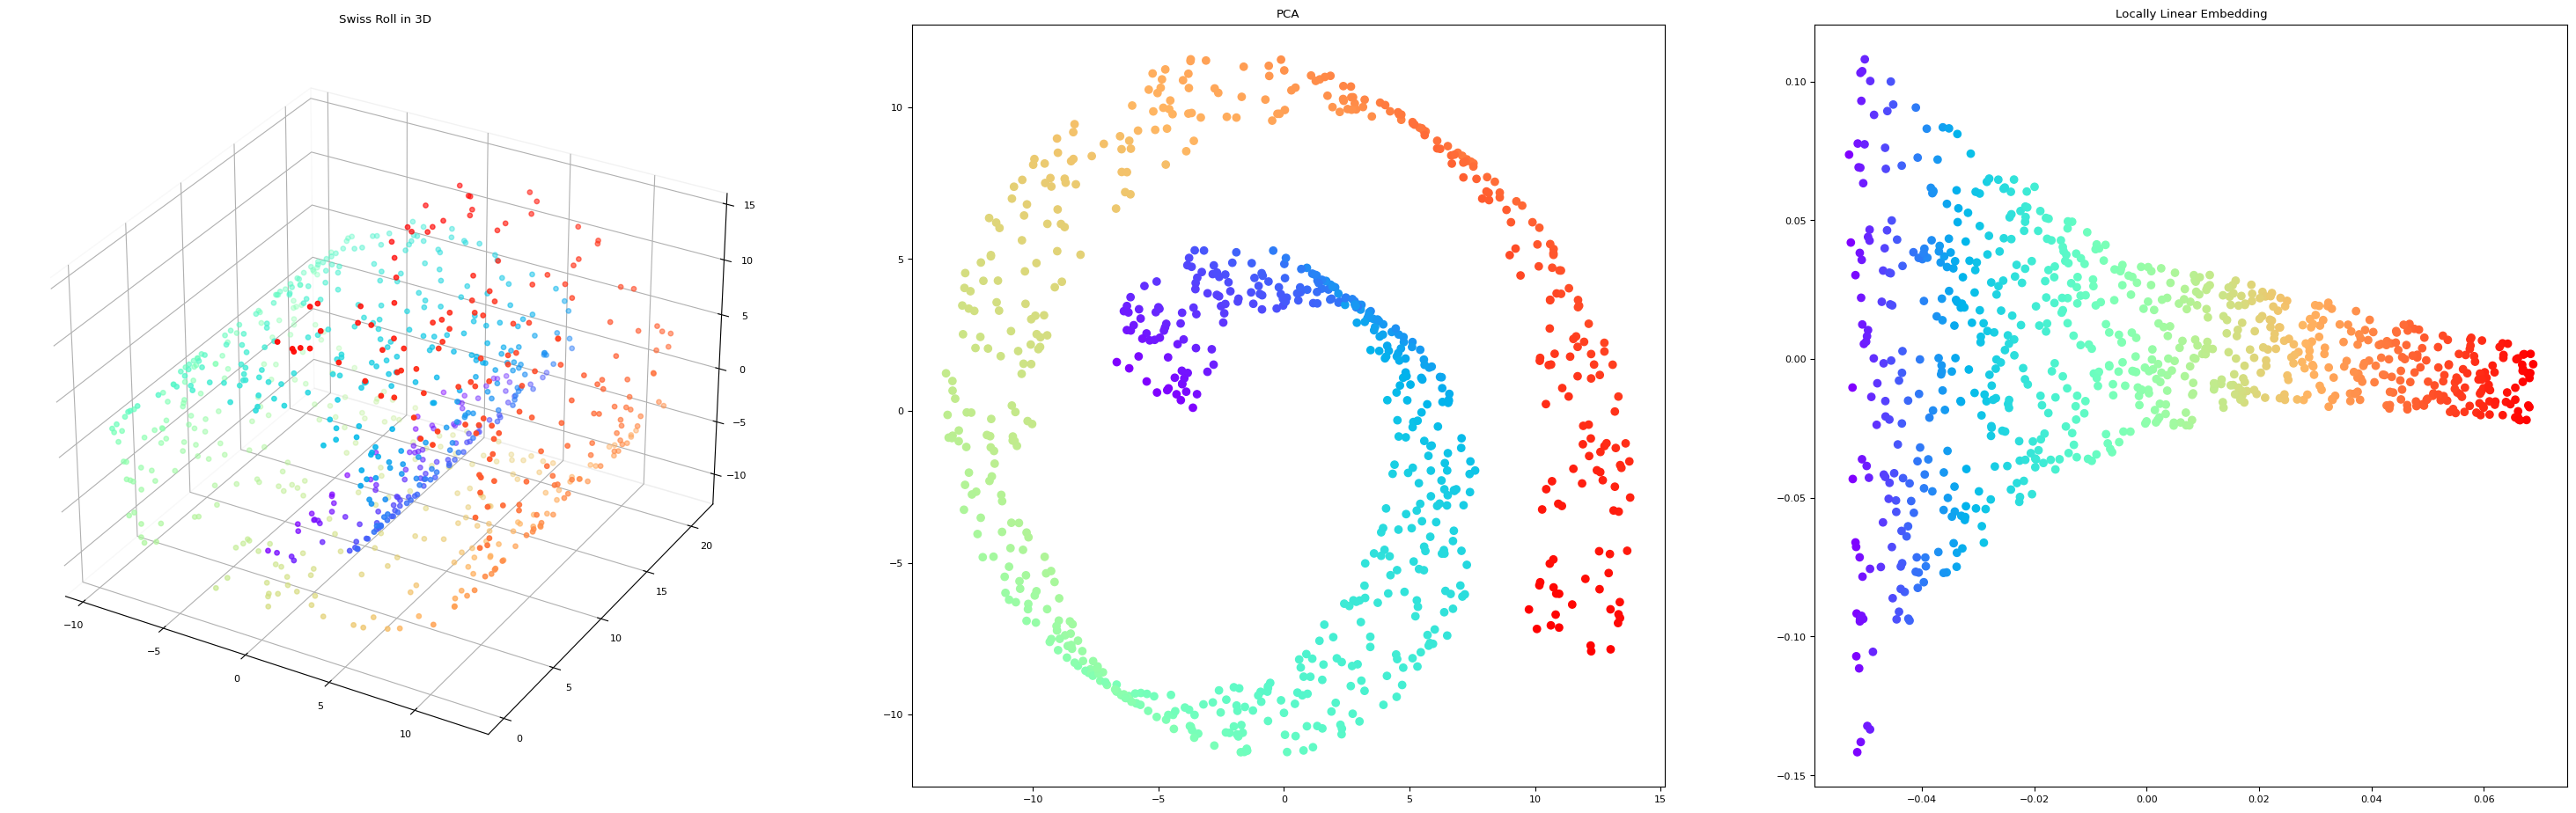

In [22]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=plt.figaspect(0.3)*fig_scale*2.5)
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow, s=10*fig_scale)
plt.title('Swiss Roll in 3D')

ax2 = fig.add_subplot(1, 3, 2)
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('PCA');

ax3 = fig.add_subplot(1, 3, 3)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('Locally Linear Embedding');

### Apprentissage par renforcement

- Développer un agent qui améliore ses performances en fonction des interactions avec l'environnement.
    - Exemple : jeux d'échecs, de go,...
- Recherche dans un (grand) espace d'actions et d'états
- La fonction de récompense définit l'efficacité d'une (série d') actions.
- Apprendre une série d'actions (politique) qui maximise la récompense à travers l'exploration

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_rl2.png" alt="ml" style="width: 50%;"/>


## Apprentissage = Représentation + évaluation + optimisation
Tous les algorithmes d'apprentissage automatique se composent de 3 éléments :
- **Représentation** : Un modèle $f_{\theta}$ doit être représenté dans un langage formel que l'ordinateur peut manipuler.
    - Définit les "concepts" qu'il peut apprendre, l'_espace des hypothèses_.
    - Par exemple, un arbre de décision, un réseau neuronal, un ensemble de points de données annotés.
- **L'évaluation** : Une manière _interne_ de choisir une hypothèse plutôt qu'une autre
    - Fonction objective, fonction de notation, fonction de perte $\mathcal{L}(f_{\theta})$
    - Par exemple, différence entre la sortie correcte et les prédictions.
- **Optimisation** : Une manière _efficace_ de rechercher l'espace des hypothèses
    - Commencer par une hypothèse simple, l'étendre (la relaxer) si elle ne correspond pas aux données.
    - Démarrer avec un ensemble initial de paramètres de modèle, les affiner progressivement
    - Nombreuses méthodes, différant par la vitesse d'apprentissage, le nombre d'optima,...
    
Un modèle puissant/flexible n'est utile que s'il peut également être optimisé efficacement.

### Réseaux neuronaux : représentation
Prenons l'exemple des réseaux neuronaux
* Représentation : réseau neuronal (en couches)
    * Chaque connexion a un _poids_ $\theta_i$ (c'est-à-dire les paramètres du modèle).
    * Chaque nœud reçoit des entrées pondérées et émet une nouvelle valeur.
    * Le modèle $f$ renvoie la sortie de la dernière couche.    
* L'architecture, le nombre/type de neurones, etc. sont fixes.
    * Nous les appelons _hyperparamètres_ (définis par l'utilisateur, fixés pendant l'entrainement).

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/08_nn_basic_arch.png" alt="ml" style="width: 40%;"/>
    


### Réseaux neuronaux : évaluation et optimisation
* Représentation : Compte tenu de la structure, le modèle est représenté par ses paramètres
    * Imaginez un mini-réseau avec deux poids ($\theta_0,\theta_1$) : un espace de recherche à 2 dimensions.
* Évaluation : Une _fonction de perte_ $\mathcal{L}(\theta)$ calcule la qualité des prédictions
    * _Estimation_ sur un ensemble de données d'apprentissage avec les prédictions "correctes".
    * Nous ne pouvons pas voir toute la surface, mais seulement évaluer des ensembles spécifiques de paramètres.
* Optimisation : Trouver l'ensemble optimal de paramètres
    * Généralement un type de _recherche_ dans l'espace d'hypothèse
    * Descente de gradient : $\theta_i^{new} = \theta_i - \frac{\partial \mathcal{L}(\theta)}{\partial \theta_i} $
    

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_ml3.png" alt="ml" style="float: left; width: 90%;"/>

## Surapprentissage (overfitting) et sous-apprentissage(underfitting)
* Il est facile de construire un modèle complexe qui est 100% précis sur les données d'apprentissage, mais très mauvais sur les nouvelles données.
* Surapprentissage : construction d'un modèle qui est _trop complexe pour la quantité de données_ que vous avez.
    * Vous modélisez des particularités dans vos données d'apprentissage (bruit, biais,...)
    * Résoudre en rendant le modèle plus simple (régularisation), ou en obtenant plus de données.
    * La plupart des algorithmes ont des hyperparamètres qui permettent la régularisation.
* Sous-apprentissage : construction d'un modèle qui est _trop simple compte tenu de la complexité des données_.
    * Utiliser un modèle plus complexe
* Il existe des techniques pour détecter l'overfitting (par exemple, l'analyse biais-variance). Nous y reviendrons plus tard
* Vous pouvez construire des _ensembles_ de plusieurs modèles pour surmonter à la fois l'underfitting et l'overfitting. 

![](of.jpeg)

* Il y a souvent un "sweet spot" ("point optimal") qu'il faut trouver en optimisant le choix des algorithmes et des hyperparamètres, ou en utilisant plus de données.  
* Exemple : régression à l'aide de fonctions polynomiales

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X3 = np.sort(np.random.rand(n_samples))
y3 = true_fun(X3) + np.random.randn(n_samples) * 0.1
X3_test = np.linspace(0, 1, 100)
scores_x, scores_y = [], []

show_output = True

@interact
def plot_poly(degrees = (1, 16, 1)):
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X3[:, np.newaxis], y3)

    # Evaluer les modeles en utilisant la crossvalidation
    scores = cross_val_score(pipeline, X3[:, np.newaxis], y3,
                             scoring="neg_mean_squared_error", cv=10)   
    scores_x.append(degrees)
    scores_y.append(-scores.mean())

    if show_output:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale))    
        ax1.plot(X3_test, pipeline.predict(X3_test[:, np.newaxis]), label="Model")
        ax1.plot(X3_test, true_fun(X3_test), label="True function")
        ax1.scatter(X3, y3, edgecolor='b', label="Samples")
        ax1.set_xlabel("x")
        ax1.set_ylabel("y")
        ax1.set_xlim((0, 1))
        ax1.set_ylim((-2, 2))
        ax1.legend(loc="best")
        ax1.set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees, -scores.mean(), scores.std()))

        # Visualization des scores
        ax2.scatter(scores_x, scores_y, edgecolor='b')
        order = np.argsort(scores_x)
        ax2.plot(np.array(scores_x)[order], np.array(scores_y)[order])
        ax2.set_xlim((0, 16))
        ax2.set_ylim((10**-2, 10**11))
        ax2.set_xlabel("degree")
        ax2.set_ylabel("error", labelpad=0)
        ax2.set_yscale("log")

        fig.show()

interactive(children=(IntSlider(value=8, description='degrees', max=16, min=1), Output()), _dom_classes=('widg…

In [24]:
from IPython.display import clear_output
from ipywidgets import IntSlider, Output

if not interactive:
    show_output = False
    for i in range(1,15):
        plot_poly(degrees = i)
    
    show_output = True
    plot_poly(degrees = 15)

### Sélection du modèle
- Outre la fonction de perte/loss function (interne), nous avons besoin d'une fonction d'évaluation (externe)
    - Signal de retour : apprenons-nous réellement la bonne chose ? 
        - Sommes-nous en train de sous-apprendre ou de surapprendre ?
    - Choisir avec soin pour résoudre le problème.
    - Nécessaire pour choisir entre les modèles (et les configurations des hyperparamètres)
    
&copy; XKCD
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/xkcd.jpg" alt="ml" style="width: 30%;"/>

- Les données doivent être divisées en ensembles d'*entraînement* et de _test_.
    - Optimiser les paramètres du modèle sur l'ensemble d'entraînement, évaluer sur l'ensemble de test indépendant
- Éviter les "fuites de données" :
    - Ne jamais optimiser les configurations de l'hyperparamètre sur les données de test
    - Ne jamais choisir les techniques de prétraitement sur la base des données de test.
- Pour optimiser les hyperparamètres et le prétraitement, mettre de côté une partie de l'ensemble d'entraînement en tant qu'ensemble de _validation
    - Garder l'ensemble de test caché pendant _tous_ les entraînements

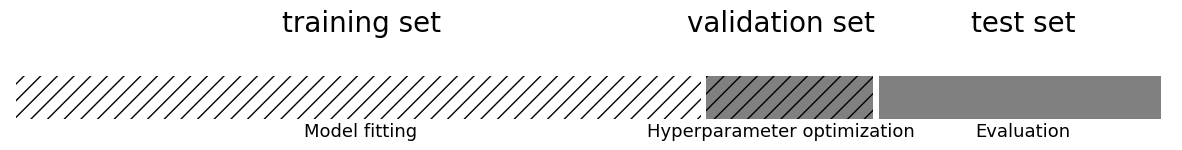

In [25]:
import mglearn
mglearn.plots.plot_threefold_split()

* Pour une configuration d'hyperparamètres donnée, apprendre les paramètres du modèle sur l'ensemble d'apprentissage.
    * Minimiser la perte/loss
* Évaluer le modèle entraîné sur l'ensemble de validation
    * Ajuster les hyperparamètres pour maximiser une certaine métrique (par exemple, la précision).

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_hyperparams.png" alt="ml" style="width: 40%;"/>

### Seule la généralisation compte !
* N'évaluez jamais vos modèles finaux sur les données d'apprentissage, sauf pour :
    * Vérifier si l'optimiseur converge (courbes d'apprentissage)
    * Diagnostiquer un sous-apprentissage ou un surapprentissage :
        * Faible score d'entraînement et de test : sous-apprentissage
        * Score d'entraînement élevé, score de test faible : surapprentissage
* Toujours conserver un ensemble de tests complètement indépendant 
* Sur les petits ensembles de données, utilisez plusieurs divisions entraînement-test pour éviter les biais d'échantillonnage.
    * Vous pouvez échantillonner un ensemble de test "facile" par accident.
    * Utiliser la validation croisée (voir plus loin)

## De meilleures représentations des données, de meilleurs modèles
- L'algorithme doit transformer correctement les données d'entrée en données de sortie.
- Beaucoup dépend de la manière dont nous présentons les données à l'algorithme
    - Transformer les données en une meilleure représentation (alias _encodage_ ou _embedding_)
    - Peut se faire de bout en bout (p. ex. apprentissage profond) ou en commençant par "prétraiter" les données (p. ex. sélection/génération de caractéristiques).

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_representation.png" alt="ml" style="width: 80%"/>

### Ingénierie des caractéristiques
* La plupart des techniques d'apprentissage automatique exigent des humains qu'ils construisent une bonne représentation des données.  
* Surtout lorsque les données sont naturellement structurées (par exemple, un tableau avec des colonnes significatives).
* L'ingénierie des caractéristiques est souvent nécessaire pour obtenir les meilleurs résultats.
    * Sélection des caractéristiques, réduction de la dimensionnalité, mise à l'échelle, ...
    * L'apprentissage automatique appliqué est essentiellement de l'ingénierie des caractéristiques (Andrew Ng).
* Rien ne vaut la connaissance du domaine (lorsqu'elle est disponible) pour obtenir une bonne représentation.
    * Par exemple, les données sur les iris : la longueur/largeur des feuilles permet de bien séparer les classes.
    
Construire des prototypes dès le début

### Apprentissage des transformations de données de bout en bout
* Pour les données non structurées (images, texte, etc.), il est difficile d'extraire de bonnes caractéristiques.
* Apprentissage en profondeur : apprendre sa propre représentation des données (embedding) 
    * Par le biais de plusieurs couches de représentation (par exemple, des couches de neurones).
    * Chaque couche transforme un peu les données, en fonction de ce qui réduit l'erreur.
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_layers.png" alt="ml" style="width: 60%"/>

#### Exemple : classification des chiffres
- Les pixels d'entrée sont introduits, chaque couche les transforme en une représentation de plus en plus informative pour la tâche donnée.
- Souvent moins intuitif pour les humains

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_layers2.png" alt="ml" style="width: 60%"/>

### La malédiction de la dimensionnalité
* Il ne suffit pas d'ajouter un grand nombre de caractéristiques et de laisser le modèle s'en charger.
* Nos hypothèses (biais inductifs) échouent souvent dans les dimensions élevées : 
    - Échantillonner au hasard des points dans un espace à n dimensions (par exemple, un hypercube unitaire).
    - Presque tous les points deviennent des valeurs aberrantes au bord de l'espace.
    - Les distances entre deux points deviennent presque identiques.

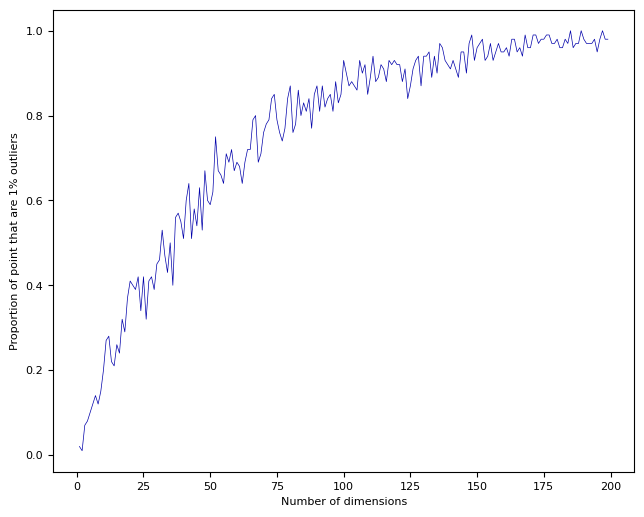

In [26]:
# Code ecrit a l'origine par Peter Norvig 
def sample(d=2, N=100):
    return [[np.random.uniform(0., 1.) for i in range(d)] for _ in range(N)]

def corner_count(points):
    return np.mean([any([(d < .01 or d > .99) for d in p]) for p in points])

def go(Ds=range(1,200)):
    plt.figure(figsize=(5*fig_scale, 4*fig_scale))
    plt.plot(Ds, [corner_count(sample(d)) for d in Ds])
    plt.xlabel("Number of dimensions")
    plt.ylabel("Proportion of point that are 1% outliers")
    
go()

#### Conséquences pratiques
* Pour chaque dimension (caractéristique) que vous ajoutez, vous avez besoin d'une quantité exponentielle de données pour éviter la dispersion.
* Affecte tout algorithme basé sur les distances (par exemple kNN, SVM, méthodes basées sur le noyau, méthodes basées sur les arbres,...)
* Bénédiction de la non-uniformité : dans de nombreuses applications, les données se trouvent dans un sous-espace très restreint.
    * Vous pouvez améliorer considérablement les performances en sélectionnant des caractéristiques ou en utilisant des représentations de données de dimensions inférieures.

## "Un plus grand nombre de données peut battre un algorithme plus intelligent"
(mais il faut les deux)

* Plus de données réduit le risque de surapprentissage.
* Des données moins éparses réduisent la malédiction de la dimensionnalité
* Modèles non paramétriques : le nombre de paramètres du modèle augmente avec la quantité de données.
    - Techniques basées sur les arbres, k-Nearest neighbors, SVM,...
    - Elles peuvent apprendre n'importe quel modèle à partir d'un nombre suffisant de données (mais peuvent rester bloquées dans des minima locaux).
* Modèles _paramétriques_ (taille fixe) : nombre fixe de paramètres du modèle
    - Modèles linéaires, réseaux neuronaux,...
    - Peuvent être dotés d'un grand nombre de paramètres pour bénéficier de plus de données 
    - Les modèles d'apprentissage profond peuvent avoir des millions de poids, apprendre presque n'importe quelle fonction.
* Le goulot d'étranglement est le passage des données au calcul/à l'évolutivité.

## Construire des systèmes d'apprentissage automatique
Un système d'apprentissage automatique typique comporte plusieurs composants, que nous aborderons dans les prochains cours :
    
- Le prétraitement : Les données brutes sont rarement idéales pour l'apprentissage
    - Mise à l'échelle des caractéristiques : regrouper les valeurs dans un même intervalle
    - Encodage : rendre les caractéristiques catégorielles numériques
    - Discrétisation : rendre les caractéristiques numériques catégorielles
    - Correction du déséquilibre des labels (par exemple, réduction de l'échantillonnage)
    - Sélection des caractéristiques : suppression des caractéristiques inintéressantes/corrélées
    - La réduction de la dimensionnalité peut également faciliter l'apprentissage des données
    - Utilisation d'embeddings pré entraînés (par exemple, de mot à vecteur, d'image à vecteur)
    

- Apprentissage et évaluation
    - Chaque algorithme a ses propres biais
    - Aucun algorithme n'est toujours le meilleur
    - La sélection de modèles compare et sélectionne les meilleurs modèles.
        - Différents algorithmes, différentes configurations hyperparamétriques
    - Diviser les données en ensembles d'apprentissage, de validation et de test
    
- Prédiction
    - Le modèle optimisé final peut être utilisé pour la prédiction
    - La performance attendue est la performance mesurée sur un ensemble de test _indépendant_.

- Ensemble, ils forment un _flux de travail_ de _pipeline_
- Il existe des méthodes d'apprentissage automatique pour construire et ajuster ces pipelines.
- Vous devez optimiser les pipelines en permanence
    - Concept du **Drift**(dérive) : le phénomène que vous modélisez peut changer au fil du temps.
    - Retour d'information : les prédictions de votre modèle peuvent modifier les données futures. 

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_pipeline2.png" alt="ml" style="width: 80%"/>

## Résumé
* Les algorithmes d'apprentissage contiennent 3 composants :
    - Représentation : un modèle $f$ qui fait correspondre les données d'entrée $X$ à la sortie souhaitée $y$
        - Contient des paramètres de modèle $\theta$ qui peuvent être adaptés aux données $X$.
    - Fonction de perte $\mathcal{L}(f_{\theta}(X))$ : mesure l'adéquation du modèle aux données
    - Technique d'optimisation pour trouver le $\theta$ optimal : $\underset{\theta}{\operatorname{argmin}} \mathcal{L}(f_{\theta}(X))$
* Sélectionner le bon modèle, puis l'ajuster aux données pour minimiser une erreur spécifique à la tâche $\mathcal{E}$. 
    - Biais inductif $b$ : hypothèses sur le modèle et les hyperparamètres  
    $\underset{\theta,b}{\operatorname{argmin}} \mathcal{E}(f_{\theta, b}(X))$

* Surapprentissage : le modèle s'adapte bien aux données d'apprentissage mais pas aux nouvelles données (test).
    - Diviser les données en (multiples) ensembles entrainement-validation-test
    - Régularisation : réglage des hyperparamètres (sur l'ensemble de validation) pour simplifier le modèle
    - Collecter plus de données ou construire des modèles ensemblistes
* Lignes de conduite pour l'apprentissage automatique : prétraitement + apprentissage + déploiement